## Оглавление
  
1. [индексирование, срезы, сортировка](#task1)   
2. [Общие подходы к работе с любой коллекцией](#task2)  
3. [Конвертация одного типа коллекции в другой](#task3)  
4. [Объединение строк, кортежей, списков, словарей без изменения исходных](#task4)  
5. [Объединение множеств без изменения исходных](#task5) 
6. [Объединение списка, словаря и изменяемого множества с изменением исходной коллекции](#task6) 
7. [Добавление и удаление элементов изменяемых коллекций](#task7)   
8. [Особенности работы с изменяемой и не изменяемой коллекцией](#task8) 
9. [Все о выражениях-генераторах, генераторах списков, множеств и словарей](#task9) 
10. [.extend( )](#task10) 
11. [.insert( )](#task11) 
12. [{ } Множества](#task12)

##### 1. индексирование, срезы, сортировка
<a id='task1'></a>

In [2]:
# https://habr.com/ru/post/319164/    источник

# Индексированные коллекции

# Рассмотрим индексированные коллекции (их еще называют последовательности — sequences) — список (list), кортеж (tuple), строку (string).

my_str = "abcde"
print(my_str[0]) 		# a - первый элемент
print(my_str[-1])		# e - последний элемент 
print(my_str[len(my_str)-1]) 	# e - так тоже можно взять последний элемент
print(my_str[-2]) 

a
e
e
d


In [3]:
# Наши коллекции могут иметь несколько уровней вложенности, как список списков в примере ниже.
# Для перехода на уровень глубже ставится вторая пара квадратных скобок и так далее.

my_2lvl_list = [[1, 2, 3], ['a', 'b', 'c']]
print(my_2lvl_list[0])      # [1, 2, 3] - первый элемент — первый вложенный список
print(my_2lvl_list[0][0])   # 1 — первый элемент первого вложенного списка
print(my_2lvl_list[1][-1])  # с — последний элемент второго вложенного списка

[1, 2, 3]
1
c


In [4]:
# Поскольку кортежи и строки у нас неизменяемые коллекции, то по индексу мы можем только брать элементы, но не менять их:

my_tuple = (1, 2, 3, 4, 5)
print(my_tuple[0])	  # 1
my_tuple[0] = 100         # TypeError: 'tuple' object does not support item assignment

1


TypeError: 'tuple' object does not support item assignment

In [6]:
# А вот для списка, если взятие элемента по индексу располагается в левой части выражения, а далее идёт оператор присваивания =, то мы задаём новое значение элементу с этим индексом.

my_list = [1, 2, 3, [4, 5]]
my_list[0] = 10
my_list[-1][0] = 40
print(my_list)      	# [10, 2, 3, [40, 5]]

# UPD: Примечание: Для такого присвоения, элемент уже должен существовать в списке, нельзя таким образом добавить элемент на несуществующий индекс.

my_list = [1, 2, 3, 4, 5]
my_list[5] = 6      # IndexError: list assignment index out of range


[10, 2, 3, [40, 5]]


IndexError: list assignment index out of range

In [8]:
# Синтаксис среза

#Очень часто, надо получить не один какой-то элемент, а некоторый их набор ограниченный определенными простыми правилами
# — например первые 5 или последние три, или каждый второй элемент 
# — в таких задачах, вместо перебора в цикле намного удобнее использовать так называемый срез (slice, slicing).

# Синтаксис среза похож на таковой для индексации, но в квадратных скобках вместо одного значения указывается 2-3 через двоеточие:

#                   my_collection[start:stop:step]  # старт, стоп и шаг

# Особенности среза:

# Отрицательные значения старта и стопа означают, что считать надо не с начала, а с конца коллекции.

# Отрицательное значение шага — перебор ведём в обратном порядке справа налево.

# Если не указан старт [:stop:step]— начинаем с самого края коллекции, 
# то есть с первого элемента (включая его), если шаг положительный или с последнего (включая его), если шаг отрицательный (и соответственно перебор идет от конца к началу).

# Если не указан стоп [start:: step] — идем до самого края коллекции, 
# то есть до последнего элемента (включая его), если шаг положительный или до первого элемента (включая его), если шаг отрицательный (и соответственно перебор идет от конца к началу).

# step = 1, то есть последовательный перебор слева направо указывать не обязательно — это значение шага по умолчанию. В таком случае достаточно указать [start:stop]
# Можно сделать даже так [:] — это значит взять коллекцию целиком

# ВАЖНО: При срезе, первый индекс входит в выборку, а второй нет!
#То есть от старта включительно, до стопа, где стоп не включается в результат. Математически это можно было бы записать как [start, stop) 
#или пояснить вот таким правилом:    [ <первый включаемый> : <первый НЕ включаемый> : <шаг> ]

# Поэтому, например, mylist[::-1] не идентично mylist[:0:-1], так как в первом случае мы включим все элементы, а во втором дойдем до 0 индекса, но не включим его!

col = 'abcdefg'
print(col[:])       # abcdefg
print(col[::-1])    # gfedcba
print(col[::2])     # aceg
print(col[1::2])    # bdf
print(col[:1])      # a
print(col[-1:])     # g
print(col[3:4])     # d
print(col[-3:])     # efg
print(col[-3:1:-1]) # edc
print(col[2:5])     # cde

abcdefg
gfedcba
aceg
bdf
a
g
d
efg
edc
cde


In [9]:
# . Именованные срезы

# Чтобы избавится от «магических констант», особенно в случае, когда один и тот же срез надо применять многократно, 
# можно задать константы с именованными срезами с пользованием специальной функции slice()()

# Примечание: Nonе соответствует опущенному значению по-умолчанию. То есть [:2] становится slice(None, 2), а [1::2] становится slice(1, None, 2).

person = ('Alex', 'Smith', "May", 10, 1980)
NAME, BIRTHDAY = slice(None, 2), slice(2, None)       
	# задаем константам именованные срезы
        # данные константы в квадратных скобках заменятся соответствующими срезами
print(person[NAME])      # ('Alex', 'Smith')
print(person[BIRTHDAY])  # ('May', 10, 1980)



my_list = [1, 2, 3, 4, 5, 6, 7]
EVEN = slice(1, None, 2)
print(my_list[EVEN])     # [2, 4, 6]

('Alex', 'Smith')
('May', 10, 1980)
[2, 4, 6]


In [10]:
# Изменение списка срезом

# Важный момент, на котором не всегда заостряется внимание — с помощью среза можно не только получать копию коллекции, 
# но в случае списка можно также менять значения элементов, удалять и добавлять новые.

# Даже если хотим добавить один элемент, необходимо передавать итерируемый объект, иначе будет ошибка TypeError: can only assign an iterable

my_list = [1, 2, 3, 4, 5]
# my_list[1:2] = 20     # TypeError: can only assign an iterable
my_list[1:2] = [20]     # Вот теперь все работает
print(my_list)          # [1, 20, 3, 4, 5]

# Для вставки одиночных элементов можно использовать срез, код примеров есть ниже, но делать так не рекомендую, так как такой синтаксис хуже читать. 
# Лучше использовать методы списка .append() и .insert():

my_list = [1, 2, 3, 4, 5]
my_list[5:] = [6]      # вставляем в конец — лучше использовать .append(6)
print(my_list)         # [1, 2, 3, 4, 5, 6]
my_list[0:0] = [0]     # вставляем в начало — лучше использовать .insert(0, 0)
print(my_list)         # [0, 1, 2, 3, 4, 5, 6]
my_list[3:3] = [25]    # вставляем между элементами — лучше использовать .insert(3, 25)
print(my_list)         # [0, 1, 2, 25, 3, 4, 5, 6]

[1, 20, 3, 4, 5]
[1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 25, 3, 4, 5, 6]


In [11]:
# Можно менять части последовательности — это применение выглядит наиболее интересным, так как решает задачу просто и наглядно.

my_list = [1, 2, 3, 4, 5]
my_list[1:3] = [20, 30]
print(my_list)          # [1, 20, 30, 4, 5]
my_list[1:3] = [0]      # нет проблем заменить два элемента на один
print(my_list)          # [1, 0, 4, 5]
my_list[2:] = [40, 50, 60]   # или два элемента на три
print(my_list)               # [1, 0, 40, 50, 60]

[1, 20, 30, 4, 5]
[1, 0, 4, 5]
[1, 0, 40, 50, 60]


In [12]:
# Можно просто удалить часть последовательности

my_list = [1, 2, 3, 4, 5]
my_list[:2] = []    # или del my_list[:2]
print(my_list)      # [3, 4, 5]

[3, 4, 5]


In [ ]:
# Выход за границы индекса

# Обращение по индексу по сути является частным случаем среза, когда мы обращаемся только к одному элементу, а не диапазону. 
# Но есть очень важное отличие в обработке ситуации с отсутствующим элементом с искомым индексом.

# Обращение к несуществующему индексу коллекции вызывает ошибку:

my_list = [1, 2, 3, 4, 5]
print(my_list[-10])       # IndexError: list index out of range
print(my_list[10])        # IndexError: list index out of range



In [ ]:
# А в случае выхода границ среза за границы коллекции никакой ошибки не происходит:

my_list = [1, 2, 3, 4, 5]
print(my_list[0:10])      # [1, 2, 3, 4, 5] — отработали в пределах коллекции
print(my_list[10:100])	  # [] - таких элементов нет — вернули пустую коллекцию
print(my_list[10:11])     # [] - проверяем 1 отсутствующий элемент - пустая коллекция, без ошибки


# Примечание: Для тех случаев, когда функционала срезов недостаточно и требуются более сложные выборки, можно воспользоваться синтаксисом выражений-генераторов, 
    # рассмотрению которых посвещена 4 статья цикла.   https://habr.com/ru/post/320288/

In [13]:
# Сортировка элементов коллекции

# Сортировка элементов коллекции важная и востребованная функция, постоянно встречающаяся в обычных задачах. 
# Тут есть несколько особенностей, на которых не всегда заостряется внимание, но которые очень важны.

# Функция sorted()

# Мы может использовать функцию sorted() для вывода списка сортированных элементов любой коллекции для последующее обработки или вывода.

# функция не меняет исходную коллекцию, а возвращает новый список из ее элементов;
# не зависимо от типа исходной коллекции, вернётся список (list) ее элементов;
# поскольку она не меняет исходную коллекцию, ее можно применять к неизменяемым коллекциям;
# Поскольку при сортировке возвращаемых элементов нам не важно, был ли у элемента некий индекс в исходной коллекции, можно применять к неиндексированным коллекциям;
# Имеет дополнительные не обязательные аргументы:
# reverse=True — сортировка в обратном порядке
# key=funcname (начиная с Python 2.4) — сортировка с помощью специальной функции funcname, она может быть как стандартной функцией Python, так и специально написанной вами для данной задачи функцией и лямбдой.

my_list = [2, 5, 1, 7, 3]
my_list_sorted = sorted(my_list)
print(my_list_sorted)       # [1, 2, 3, 5, 7]

my_set = {2, 5, 1, 7, 3}
my_set_sorted = sorted(my_set, reverse=True)
print(my_set_sorted)        # [7, 5, 3, 2, 1]

# Пример сортировки списка строк по длине len() каждого элемента:

my_files = ['somecat.jpg', 'pc.png', 'apple.bmp', 'mydog.gif']
my_files_sorted = sorted(my_files, key=len)
print(my_files_sorted)      # ['pc.png', 'apple.bmp', 'mydog.gif', 'somecat.jpg']

[1, 2, 3, 5, 7]
[7, 5, 3, 2, 1]
['pc.png', 'apple.bmp', 'mydog.gif', 'somecat.jpg']


In [14]:
# Функция reversed()

# Функция reversed() применяется для последовательностей и работает по другому:

# возвращает генератор списка, а не сам список;
# если нужно получить не генератор, а готовый список, результат можно обернуть в list() или же вместо reversed() воспользоваться срезом [: :-1];
# она не сортирует элементы, а возвращает их в обратном порядке, то есть читает с конца списка;
# из предыдущего пункта понятно, что если у нас коллекция неиндексированная — мы не можем вывести её элементы в обратном порядке и эта функция к таким коллекциям не применима 
# — получим «TypeError: argument to reversed() must be a sequence»;
# не позволяет использовать дополнительные аргументы — будет ошибка «TypeError: reversed() does not take keyword arguments».

my_list = [2, 5, 1, 7, 3]
my_list_sorted = reversed(my_list)
print(my_list_sorted)           # <listreverseiterator object at 0x7f8982121450>
print(list(my_list_sorted))     # [3, 7, 1, 5, 2]
print(my_list[::-1])            # [3, 7, 1, 5, 2] - тот же результат с помощью среза

[3, 7, 1, 5, 2]
[3, 7, 1, 5, 2]


In [ ]:
# Методы списка .sort() и .reverse()

# У списка (и только у него) есть особые методы .sort() и .reverse() которые делают тоже самое, что соответствующие функции sorted() и reversed(), но при этом:

# Меняют сам исходный список, а не генерируют новый;
# Возвращают None, а не новый список;
# поддерживают те же дополнительные аргументы;
# в них не надо передавать сам список первым параметром, более того, если это сделать — будет ошибка — не верное количество аргументов.

my_list = [2, 5, 1, 7, 3]
my_list.sort()
print(my_list)          # [1, 2, 3, 5, 7]

# Обратите внимание: Частая ошибка начинающих, которая не является ошибкой для интерпретатора, но приводит не к тому результату, который хотят получить.

my_list = [2, 5, 1, 7, 3]
my_list = my_list.sort()
print(my_list)          # None

In [ ]:
# Особенности сортировки словаря

# В сортировке словаря есть свои особенности, вызванные тем, что элемент словаря — это пара ключ: значение.

# UPD: Так же, не забываем, что говоря о сортировке словаря, мы имеем ввиду сортировку полученных из словаря данных для вывода или сохранения в индексированную коллекцию.
# Сохранить данные сортированными в самом стандартном словаре не получится, они в нем, как и других неиндексированных коллекциях находятся в произвольном порядке.

# sorted(my_dict) — когда мы передаем в функцию сортировки словарь без вызова его дополнительных методов — идёт перебор только ключей, сортированный список ключей нам и возвращается;
# sorted(my_dict.keys()) — тот же результат, что в предыдущем примере, но прописанный более явно;
# sorted(my_dict.items()) — возвращается сортированный список кортежей (ключ, значение), сортированных по ключу;
# sorted(my_dict.values()) — возвращается сортированный список значений

my_dict = {'a': 1, 'c': 3, 'e': 5, 'f': 6, 'b': 2, 'd': 4}
mysorted = sorted(my_dict)
print(mysorted)           # ['a', 'b', 'c', 'd', 'e', 'f']
mysorted = sorted(my_dict.items())
print(mysorted)           # [('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6)]
mysorted = sorted(my_dict.values())
print(mysorted)           # [1, 2, 3, 4, 5, 6]

# Отдельные сложности может вызвать сортировка словаря не по ключам, а по значениям, если нам не просто нужен список значений, и именно выводить пары в порядке сортировки по значению.

# Для решения этой задачи можно в качестве специальной функции сортировки передавать lambda-функцию lambda x: x[1] 
# которая из получаемых на каждом этапе кортежей (ключ, значение) будет брать для сортировки второй элемент кортежа.

population = {"Shanghai": 24256800, "Karachi": 23500000, "Beijing": 21516000, "Delhi": 16787941}
# отсортируем по возрастанию населения:
population_sorted = sorted(population.items(), key=lambda x: x[1])
print(population_sorted)
# [('Delhi', 16787941), ('Beijing', 21516000), ('Karachi', 23500000), ('Shanghai', 24256800)]

In [ ]:
# UPD от ShashkovS: 3.5 Дополнительная информация по использованию параметра key при сортировке

# Допустим, у нас есть список кортежей названий деталей и их стоимостей.
# Нам нужно отсортировать его сначала по названию деталей, а одинаковые детали по убыванию цены.

shop = [('каретка', 1200), ('шатун', 1000), ('седло', 300),
        ('педаль', 100), ('седло', 1500), ('рама', 12000),
        ('обод', 2000), ('шатун', 200), ('седло', 2700)]

def prepare_item(item):
    return (item[0], -item[1])

shop.sort(key=prepare_item)

# Результат сортировки
# Перед тем, как сравнивать два элемента списка к ним применялась функция prepare_item, которая меняла знак у стоимости (функция применяется ровно по одному разу к каждому элементу. В результате при одинаковом первом значении сортировка по второму происходила в обратном порядке.

# Чтобы не плодить утилитарные функции, вместо использования сторонней функции, того же эффекта можно добиться с использованием лямбда-функции.

# Данные скопировать из примера выше
shop.sort(key=lambda x: (x[0], -x[1]))

# Дополнительные детали и примеры использования параметра key:
# wiki.python.org/moin/HowTo/Sorting#Key_Functions (на английском).
# habrahabr.ru/post/319200/#comment_10011882 — еще один комментарий с детальным примером ShashkovS к данной статье

# UPD от ShashkovS: 3.6 Устойчивость сортировки

# Допустим данные нужно отсортировать сначала по столбцу А по возрастанию, затем по столбцу B по убыванию, и наконец по столбцу C снова по возрастанию.

# Если данные в столбце B числовые, то при помощи подходящей функции в key можно поменять знак у элементов B, что приведёт к необходимому результату.
# А если все данные текстовые? Тут есть такая возможность.
# Дело в том, что сортировка sort в Python устойчивая (начиная с Python 2.2), то есть она не меняет порядок «одинаковых» элементов.

# Поэтому можно просто отсортировать три раза по разным ключам:
data.sort(key=lambda x: x['C'])
data.sort(key=lambda x: x['B'], reverse=True)
data.sort(key=lambda x: x['А'])

# Дополнительная информация по устойчивости сортировки и примеры: wiki.python.org/moin/HowTo/Sorting#Sort_Stability_and_Complex_Sorts (на наглийском).

 ##### 2. Общие подходы к работе с любой коллекцией
<a id='task2'></a>

In [19]:
# Зададим исходно список и словарь (скопировать перед примерами ниже):
my_list = ['a', 'b', 'c', 'd', 'e', 'f']
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}

# Печать элементов коллекции с помощью функции print()

print(my_list)   # ['a', 'b', 'c', 'd', 'e', 'f']
print(my_dict)   # {'a': 1, 'c': 3, 'e': 5, 'f': 6, 'b': 2, 'd': 4}
                 # Не забываем, что порядок элементов в неиндексированных коллекциях не сохраняется.
    
    # Подсчёт количества членов коллекции с помощью функции len()

print(len(my_list)) # 6
print(len(my_dict)) # 6 - для словаря пара ключ-значение считаются одним элементом. 
print(len('ab c')) # 4 - для строки элементом является 1 символ



['a', 'b', 'c', 'd', 'e', 'f']
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}
6
6
4


In [ ]:
# Проверка принадлежности элемента данной коллекции c помощью оператора in

# x in s — вернет True, если элемент входит в коллекцию s и False — если не входит
# Есть и вариант проверки не принадлежности: x not in s, где есть по сути, просто добавляется отрицание перед булевым значением предыдущего выражения.

my_list = ['a', 'b', 'c', 'd', 'e', 'f']
print('a' in my_list)           # True
print('q' in my_list)           # False
print('a' not in my_list)       # False
print('q' not in my_list)       # True

# Для словаря возможны варианты, понятные из кода ниже:

my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}
print('a' in my_dict)               # True - без указания метода поиск по ключам
print('a' in my_dict.keys())        # True - аналогично примеру выше
print('a' in my_dict.values())      # False - так как 'а' — ключ, не значение
print(1 in my_dict.values())        # True

# Можно ли проверять пары? Можно!

print(('a',1) in my_dict.items())   # True
print(('a',2) in my_dict.items())   # False

# Для строки можно искать не только один символ, но и подстроку:

print('ab' in 'abc')    # True

In [33]:
# Обход всех элементов коллекции в цикле for in

# В данном случае, в цикле будут последовательно перебираться элементы коллекции, пока не будут перебраны все из них.

my_list = ['a', 'b', 'c', 'd', 'e', 'f']
for elm in my_list:
    print(elm)
print()
# Обратите внимание на следующие моменты:

# Порядок обработки элементов для не индексированных коллекций будет не тот, как при их создании
# У прохода в цикле по словарю есть свои особенности:
print()

my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}

for elm in my_dict:
# При таком обходе словаря, перебираются только ключи
# равносильно for elm in my_dict.keys()
    print(elm)
print()
for elm in my_dict.values():
     # При желании можно пройти только по значениям
    print(elm)
print()
# Но чаще всего нужны пары ключ(key) — значение (value).

for key, value in my_dict.items():
# Проход по .items() возвращает кортеж (ключ, значение), 
# который присваивается кортежу переменных key, value
    print(key, value)
print()
# Возможная ошибка: Не меняйте количество элементов коллекции в теле цикла во время итерации по этой же коллекции! — Это порождает не всегда очевидные на первый взгляд ошибки.

# Чтобы этого избежать подобных побочных эффектов, можно, например, итерировать копию коллекции:

for elm in list(my_list):
    # Теперь можете удалять и добавлять элементы в исходный список my_list,
    # так как итерация идет по его копии.
    print(elm)

a
b
c
d
e
f


a
b
c
d
e
f

1
2
3
4
5
6

a 1
b 2
c 3
d 4
e 5
f 6

a
b
c
d
e
f


In [34]:
# Функции min(), max(), sum()

# Функции min(), max() — поиск минимального и максимального элемента соответственно — работают не только для числовых, но и для строковых значений.
# sum() — суммирование всех элементов, если они все числовые.
my_list = ['a', 'b', 'c', 'd', 'e', 'f']
print(min(my_list))               # a

my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}
print(sum(my_dict.values()))      # 21

a
21


In [35]:
# .count() — метод подсчета определенных элементов для неуникальных коллекций (строка, список, кортеж), возвращает сколько раз элемент встречается в коллекции.

my_list = [1, 2, 2, 2, 2, 3]
print(my_list.count(2))     # 4 экземпляра элемента равного 2
print(my_list.count(5))     # 0 - то есть такого элемента в коллекции нет


4
0


In [36]:
# .index() — возвращает минимальный индекс переданного элемента для индексированных коллекций (строка, список, кортеж)

my_list = [1, 2, 2, 2, 2, 3]
print(my_list.index(2))  # первый элемент равный 2 находится по индексу 1 (индексация с нуля!)
print(my_list.index(5))  # ValueError: 5 is not in list - отсутствующий элемент выдаст ошибку!

1


ValueError: 5 is not in list

In [37]:
# .copy() — метод возвращает неглубокую (не рекурсивную) копию коллекции (список, словарь, оба типа множества).

my_set = {1, 2, 3}
my_set_2 = my_set.copy()
print(my_set_2 == my_set)  # True - коллекции равны - содержат одинаковые значения
print(my_set_2 is my_set)  # False - коллекции не идентичны - это разные объекты с разными id

True
False


In [39]:
# .clear() — метод изменяемых коллекций (список, словарь, множество), удаляющий из коллекции все элементы и превращающий её в пустую коллекцию.

my_set = {1, 2, 3}
print(my_set)  # {1, 2, 3}
my_set.clear()
print(my_set)  # set()

{1, 2, 3}
set()


In [40]:
# Особые методы сравнения множеств (set, frozenset)

# set_a.isdisjoint(set_b) — истина, если set_a и set_b не имеют общих элементов.
# set_b.issubset(set_a) — если все элементы множества set_b принадлежат множеству set_a, то множество set_b целиком входит в множество set_a 
# и является его подмножеством (set_b — подмножество)
# set_a.issuperset(set_b) — соответственно, если условие выше справедливо, то set_a — надмножество

set_a = {1, 2, 3}              
set_b = {2, 1}                  # порядок элементов не важен!
set_c = {4}
set_d = {1, 2, 3}

print(set_a.isdisjoint(set_c))  # True - нет общих элементов
print(set_b.issubset(set_a))    # True  - set_b целиком входит в set_a, значит set_b - подмножество
print(set_a.issuperset(set_b))  # True - set_b целиком входит в set_a, значит set_a - надмножество

# При равенстве множеств они одновременно и подмножество и надмножество друг для друга
print(set_a.issuperset(set_d))  # True
print(set_a.issubset(set_d))    # True

True
True
True
True
True


  ##### 3. Конвертация одного типа коллекции в другой
<a id='task3'></a>

In [41]:


# В зависимости от стоящих задач, один тип коллекции можно конвертировать в другой тип коллекции. 
# Для этого, как правило достаточно передать одну коллекцию в функцию создания другой (они есть в таблице выше).

my_tuple = ('a', 'b', 'a')
my_list = list(my_tuple)
my_set = set(my_tuple)		        # теряем индексы и дубликаты элементов!
my_frozenset = frozenset(my_tuple)      # теряем индексы и дубликаты элементов!
print(my_list, my_set, my_frozenset)    # ['a', 'b', 'a'] {'a', 'b'} frozenset({'a', 'b'})

# Обратите внимание, что при преобразовании одной коллекции в другую возможна потеря данны:

# При преобразовании в множество теряются дублирующие элементы, так как множество содержит только уникальные элементы! 
# Собственно, проверка на уникальность, обычно и является причиной использовать множество в задачах, где у нас есть в этом потребность.
# При конвертации индексированной коллекции в неиндексированную теряется информация о порядке элементов, а в некоторых случаев она может быть критически важной!
# После конвертации в не изменяемый тип, мы больше не сможем менять элементы коллекции — удалять, изменять, добавлять новые. 
# Это может привести к ошибкам в наших функциях обработки данных, если они были написаны для работы с изменяемыми коллекциями.

# Дополнительные детали:

# Способом выше не получится создать словарь, так как он состоит из пар ключ: значение.

# Это ограничение можно обойти, создав словарь комбинируя ключи со значениями с использованием zip():

my_keys = ('a', 'b', 'c')
my_values = [1, 2]      # Если количество элементов разное - 
       # будет отработано пока хватает на пары - лишние отброшены
my_dict = dict(zip(my_keys, my_values))
print(my_dict)         # {'a': 1, 'b': 2}

# Создаем строку из другой коллекции:

my_tuple = ('a', 'b', 'c')
my_str = ''.join(my_tuple)
print(my_str)       # abc

# Возможная ошибка: Если Ваша коллекция содержит изменяемые элементы (например список списков), 
# то ее нельзя конвертировать в не изменяемую коллекцию, так как ее элементы могут быть только не изменяемыми!

my_list = [1, [2, 3], 4]
my_set = set(my_list)   # TypeError: unhashable type: 'list'

# Примечание: Самые мощные и гибкие способы — генераторы коллекций будут рассмотрены отдельно в четвертой части цикла, так как там много нюансов и вариантов использования, 
# на которых редко заостряют внимание, и требуется детальный разбор.

# UPD: ShashkovS в комментариях выложил ссылки на важную и полезную информацию по алгоритмической сложности операций с коллекциями:
# TimeComplexity (aka «Big O» or «Big Oh») (на английском)
#  Complexity of Python Operations (на английском)

['a', 'b', 'a'] {'b', 'a'} frozenset({'b', 'a'})
{'a': 1, 'b': 2}
abc


TypeError: unhashable type: 'list'

  ##### 4. Объединение строк, кортежей, списков, словарей без изменения исходных
<a id='task4'></a>

In [42]:
# Объединение строк, кортежей, списков, словарей без изменения исходных

# Рассмотрим способы объединения строк, кортежей, списков, словарей без изменения исходных коллекций
# — когда из нескольких коллекций создаётся новая коллекция того же тип без изменения изначальных.

# Объединение строк (string) и кортежей (tuple) возможна с использованием оператора сложения «+»

str1 = 'abc'
str2 = 'de'
str3 = str1 + str2
print(str3)         # abcde

tuple1 = (1, 2, 3)
tuple2 = (4, 5)
tuple3 = tuple1 + tuple2
print(tuple3)       # (1, 2, 3, 4, 5)

abcde
(1, 2, 3, 4, 5)


In [43]:
# Для объединения списков (list) возможны три варианта без изменения исходного списка:

# Добавляем все элементы второго списка к элементам первого, (аналог метод .extend() но без изменения исходного списка):

a = [1, 2, 3]
b = [4, 5]
c = a + b           
print(a, b, c)      # [1, 2, 3]  [4, 5]  [1, 2, 3, 4, 5]

# Добавляем второй список как один элемент без изменения исходного списка (аналог метода.append() но без изменения исходного списка):

a = [1, 2, 3]
b = [4, 5]
c = a + [b]
print(a, b, c)     # [1, 2, 3]  [4, 5]  [1, 2, 3, [4, 5]]

# UPD: Способ добавленный longclaps в комментариях:

a, b = [1, 2, 3], [4, 5]
c = [*a, *b]  # работает на версии питона 3.5 и выше
print(c)      # [1, 2, 3, 4, 5]


[1, 2, 3] [4, 5] [1, 2, 3, 4, 5]
[1, 2, 3] [4, 5] [1, 2, 3, [4, 5]]
[1, 2, 3, 4, 5]


In [44]:
# Со словарем (dict) все не совсем просто.

# Сложить два словаря чтобы получить третий оператором + Питон не позволяет «TypeError: unsupported operand type(s) for +: 'dict' and 'dict'».

# Это можно сделать по-другому комбинируя методы .copy() и .update():

dict1 = {'a': 1, 'b': 2}
dict2 = {'c': 3, 'd': 4}
dict3 = dict1.copy()
dict3.update(dict2)
print(dict3)        	# {'a': 1, 'c': 3, 'b': 2, 'd': 4}

# В Питоне 3.5 появился новый более изящный способ:

dict1 = {'a': 1, 'b': 2}
dict2 = {'c': 3, 'd': 4}
dict3 = {**dict1, **dict2}
print(dict3)        	# {'a': 1, 'c': 3, 'b': 2, 'd': 4}

{'a': 1, 'b': 2, 'c': 3, 'd': 4}
{'a': 1, 'b': 2, 'c': 3, 'd': 4}


  ##### 5. Объединение множеств без изменения исходных
<a id='task5'></a>

In [ ]:
# Объединение множеств без изменения исходных

# Для обоих типов множеств (set, frozenset) возможны различные варианты комбинации множеств (исходные множества при этом не меняются — возвращается новое множество).

# Зададим исходно два множества (скопировать перед каждым примером ниже)
a = {'a', 'b'}
b = {    'b', 'c'}	# отступ перед b для наглядности

In [46]:
# Объединение (union):


a = {'a', 'b'}
b = {    'b', 'c'}
c = a.union(b)     # c = b.union(a) даст такой же результат	
# c = a + b        # Обычное объединение оператором + не работает
# TypeError: unsupported operand type(s) for +: 'set' and 'set'
c = a | b          # Альтернативная форма записи объединения
print(c)           # {'a', 'c', 'b'}

{'b', 'c', 'a'}


In [48]:
# Пересечение (intersection):
a = {'a', 'b'}
b = {    'b', 'c'}
c = a.intersection(b)    # c = b.intersection(a) даст такой же результат
c = a & b                # Альтернативная форма записи пересечения
print(c)                 # {'b'}

print()  

# Пересечение более 2-х множеств сразу:
a = {'a', 'b'}
b = {     'b', 'c'}
c = {    'b', 'd'}
d = a.intersection(b, c)	# Первый вариант записи
d = set.intersection(a, b, c)   # Второй вариант записи (более наглядный)
print(d)                        # {'b'}


{'b'}

{'b'}


In [50]:
# Разница (difference) — результат зависит от того, какое множество из какого вычитаем:



a = {'a', 'b'}
b = {    'b', 'c'}
c = a.difference(b)      # c = a - b другой способ записи дающий тот же результат
print(c)                 # {'a'}
c = b.difference(a)      # c = b - a другой способ записи дающий тот же результат
print(c)                 # {'c'}

{'a'}
{'c'}


In [51]:
# Симметричная разница (symmetric_difference) Это своего рода операция противоположная пересечению 
# — выбирает элементы из обеих множеств которые не пересекаются, то есть все кроме совпадающих:

c = b.symmetric_difference(a)   
# c = a.symmetric_difference(b)       # даст такой же результат
c = b ^ a                             # Альтернативная форма записи симметричной разницы
print(c)        		      # {'a', 'c'}

{'c', 'a'}


  ##### 6. Объединение списка, словаря и изменяемого множества с изменением исходной коллекции
<a id='task6'></a>

In [57]:


# Для списка
a = [1, 2, 3]
b = [4, 5]
# Добавляем все элементы второго списка к элементам первого с измением первого списка методом .extend():

a.extend(b)    # a += b эквивалентно a.extend(b)
print(a, b)    # [1, 2, 3, 4, 5]  [4, 5]

# Добавляем второй список как один элемент с изменением первого списка методом .append():

a.append(b)    # a += [b] эквивалентно a.append(b)
print(a, b)    # [1, 2, 3, [4, 5]]  [4, 5]
# Для изменения словаря с добавления элементов другого словаря используется метод .update().

# Обратите внимание: для совпадающих ключей словаря при этом обновляются значения:

dict1 = {'a': 1, 'b': 2}
dict2 = {'a': 100, 'c': 3, 'd': 4}
dict1.update(dict2)
print(dict1)        # {'a': 100, 'c': 3, 'b': 2, 'd': 4}

# Для изменяемого множества (set) кроме операций, описанных в предыдущем разделе, также возможны их аналоги, 
# но уже с изменением исходного множества — эти методы заканчиваются на _update. Результат зависит от того, какое множество каким обновляем.

# .difference_update()

a = {'a', 'b'}
b = {     'b', 'c'}
a.difference_update(b)
print(a, b)         # {'a'} {'b', 'c'}

a = {'a', 'b'}
b = {     'b', 'c'}
b.difference_update(a)
print(a, b)         # {'a', 'b'} {'c'}

# .intersection_update()

a = {'a', 'b'}
b = {     'b', 'c'}
a.intersection_update(b)
print(a, b)         # {'b'} {'b', 'c'}

a = {'a', 'b'}
b = {     'b', 'c'}
b.intersection_update(a)
print(a, b)         # {'b', 'a'} {'b'}

# .symmetric_difference_update()

a = {'a', 'b'}
b = {     'b', 'c'}
a.symmetric_difference_update(b)    
print(a, b)         # {'c', 'a'} {'c', 'b'}

a = {'a', 'b'}
b = {     'b', 'c'}
b.symmetric_difference_update(a)
print(a, b)         # {'a', 'b'} {'c', 'a'}

[1, 2, 3, 4, 5] [4, 5]
[1, 2, 3, 4, 5, [4, 5]] [4, 5]
{'a': 100, 'b': 2, 'c': 3, 'd': 4}
{'a'} {'b', 'c'}
{'b', 'a'} {'c'}
{'b'} {'b', 'c'}
{'b', 'a'} {'b'}
{'c', 'a'} {'b', 'c'}
{'b', 'a'} {'c', 'a'}


   ##### 7. Добавление и удаление элементов изменяемых коллекций
<a id='task7'></a>

In [60]:
from IPython.display import Image # Библиотека для отображения картинок

display(Image(url='https://habrastorage.org/files/be6/e54/3a9/be6e543a942a45d6b80480c946deb583.png', 
              width = 1200) # Задаем ширину картинки
       ) 
# display(Image(filename='Python_royal_35.JPG', width = 200)) # Локальный файл

In [61]:
# Примеры использования метода .insert(index, element)
my_list = [1, 2, 3]
my_list.insert(0, 0)    # index = 0 - вставляем в начало
print(my_list)          # [0, 1, 2, 3]

my_list.insert(10, 4)   # Индекс выходит за границы списка -  просто добавим в конец
print(my_list)          # [0, 1, 2, 3, 4]

my_list.insert(-10, -1) # Индекс выходит за границы в минус - добавим в начало
print(my_list)          # [-1, 0, 1, 2, 3, 4]

my_list = [1, 2, 3]
my_list.insert(1, 1.5)  # Вставим между 1 и 2 (индексация с нуля!)
# То есть вставляется на позицию с указанным индексом, а то значение что на ней было 
# и те что правее - сдвигаются на 1 индекс вправо
print(my_list)          # [1, 1.5, 2, 3]

[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[-1, 0, 1, 2, 3, 4]
[1, 1.5, 2, 3]


In [63]:
# Примеры использования оператора del
# Работает со списком
my_list = [1, 2, 3, 4, 5, 6, 7]
del my_list[1]          # Удаление элемента по индексу
print(my_list)          # [1, 3, 4, 5, 6, 7]
del my_list[-3:-1]      # Удаление элементов выбранных срезом
print(my_list)          # [1, 3, 4, 7]
# del my_list[10]       # IndexError: list assignment index out of range

# Работает со словарем
my_dict = {'a': 1, 'b': 2, 'c': 3}
del my_dict['b']
print(my_dict)          # {'a': 1, 'c': 3}
# del my_dict['z']      # KeyError при попытке удалить не сушествующий


[1, 3, 4, 5, 6, 7]
[1, 3, 4, 7]
{'a': 1, 'c': 3}


   ##### 8. Особенности работы с изменяемой и не изменяемой коллекцией
<a id='task8'></a>

In [ ]:


# Строка неизменяемая коллекция — если мы ее меняем — мы создаем новый объект!

str1 = 'abc'
print(str1, id(str1))       # abc 140234080454000
str1 += 'de'
print(str1, id(str1))       # abcde 140234079974992 - Это НОВЫЙ объект, с другим id!

# Пример кода с двумя исходно идентичными строками.

str1 = 'abc'
str2 = str1
print(str1 is str2)       # True - это две ссылки на один и тот же объект!
str1 += 'de'              # Теперь переменная str1 ссылается на другой объект!
print(str1 is str2)       # False - теперь это два разных объекта!
print(str1, str2)         # abcde abc - разные значения

# Список изменяем и тут надо быть очень внимательным, чтобы не допустить серьезную ошибку! Сравните данный пример с примером со строками выше:

list1 = [1, 2, 3]
list2 = list1
print(list1 is list2)     # True - это две ссылки на один и тот же объект!
# А дальше убеждаемся, насколько это важно:
list1 += [4]
print(list1, list2)       # [1, 2, 3, 4] [1, 2, 3, 4] 
# изменилось значение ОБЕИХ переменных, так как обе переменные ссылаются на один объект!

# А если нужна независимая копия, с которой можно работать отдельно?

list1 = [1, 2, 3]
list2 = list(list1)       # Первый способ копирования
list3 = list1[:]          # Второй способ копирования
list4 = list1.copy()      # Третий способ копировани - только в Python 3.3+
print(id(list1), id(list2), id(list3), id(list4))      
# все 4 id разные, что значит что мы создали 4 разных объекта

list1 += [4]              # меняем исходный список
print(list1, list2, list3, list4)       # [1, 2, 3, 4] [1, 2, 3] [1, 2, 3] [1, 2, 3]  
# как мы и хотели - изменив исходный объект, его копии остались не тронутыми

   ##### 9. Все о выражениях-генераторах, генераторах списков, множеств и словарей
<a id='task9'></a>

Определения и классификация

1.1 Что и зачем

Генераторы выражений предназначены для компактного и удобного способа генерации коллекций элементов, а также преобразования одного типа коллекций в другой.
В процессе генерации или преобразования возможно применение условий и модификация элементов.
Генераторы выражений являются синтаксическим сахаром и не решают задач, которые нельзя было бы решить без их использования.

1.2 Преимущества использования генераторов выражений

Более короткий и удобный синтаксис, чем генерация в обычном цикле.
Более понятный и читаемый синтаксис чем функциональный аналог сочетающий одновременное применение функций map(), filter() и lambda.
В целом: быстрее набирать, легче читать, особенно когда подобных операций много в коде.

1.3 Классификация и особенности

Сразу скажу, что существует некоторая терминологическая путаница в русских названиях того, о чем мы будем говорить.

В данной статье используются следующие обозначения:

выражение-генератор (generator expression) — выражение в круглых скобках которое выдает создает на каждой итерации новый элемент по правилам.
генератор коллекции — обобщенное название для генератора списка (list comprehension), генератора словаря (dictionary comprehension) и генератора множества (set comprehension).


В отдельных местах, чтобы избежать нагромождения терминов, будет использоваться термин «генератор» без дополнительных уточнений.


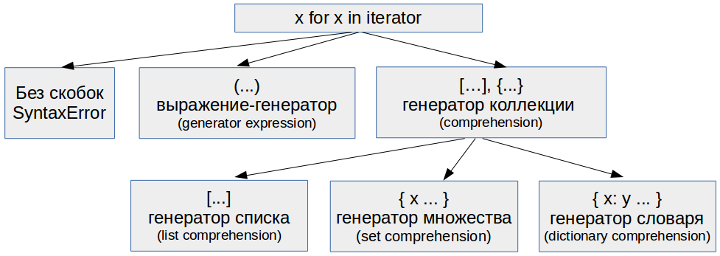

In [65]:
display(Image(filename='6880524d12ff4f689c0a84d1302c5715.png', width = 1200)) # Локальный файл

Синтаксис

Для начала приведем иллюстрацию общего синтаксиса выражения-генератора.
Важно: этот синтаксис одинаков и для выражения-генератора и для всех трех типов генераторов коллекций, разница заключается, в каких скобках он будет заключен (смотрите предыдущую иллюстрацию).

Общие принципы важные для понимания:

Ввод — это итератор — это может быть функция-генератор, выражение-генератор, коллекция — любой объект поддерживающий итерацию по нему.
Условие — это фильтр при выполнении которого элемент пойдет в финальное выражение, если элемент ему не удовлетворяет, он будет пропущен.
Финальное выражение — преобразование каждого выбранного элемента перед его выводом или просто вывод без изменений.


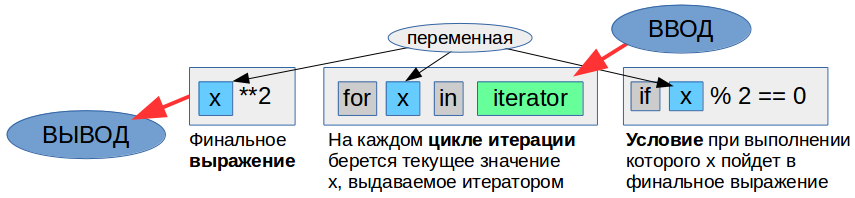

In [66]:
display(Image(filename='104b44afce044fb88d04492dd012d078.png', width = 1200)) # Локальный файл

In [ ]:
Базовый синтаксис

list_a = [-2, -1, 0, 1, 2, 3, 4, 5]    # Пусть у нас есть исходный список
list_b = [x for x in list_a]           # Создадим новый список используя генератор списка
print(list_b)                          # [-2, -1, 0, 1, 2, 3, 4, 5]
print(list_a is list_b)                # False - это разные объекты!

# По сути, ничего интересного тут не произошло, мы просто получили копию списка.
# Делать такие копии или просто перегонять коллекции из типа в тип с помощью генераторов особого смысла нет 
# — это можно сделать значительно проще применив соответствующие методы или функции создания коллекций (рассматривались в первой статье цикла).

# Мощь генераторов выражений заключается в том, что мы можем задавать условия для включения элемента в новую коллекцию 
# и можем делать преобразование текущего элемента с помощью выражения или функции перед его выводом (включением в новую коллекцию).

In [ ]:
# Добавляем условие для фильтрации

# Важно: Условие проверяется на каждой итерации, и только элементы ему удовлетворяющие идут в обработку в выражении.

# Добавим в предыдущий пример условие — брать только четные элементы.

# if x % 2 == 0 - остаток от деления на 2 равен нулю - число четное
list_a = [-2, -1, 0, 1, 2, 3, 4, 5] 
list_b = [x for x in list_a if x % 2 == 0]
print(list_b)   # [-2, 0, 2, 4]

# Мы можем использовать несколько условий, комбинируя их логическими операторами:

list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
list_b = [x for x in list_a if x % 2 == 0 and x > 0]
# берем те x, которые одновременно четные и больше нуля
print(list_b)   # [2, 4]

In [67]:
# Добавляем обработку элемента в выражении

# Мы можем вставлять не сам текущий элемент, прошедший фильтр, а результат вычисления выражения с ним или результат его обработки функцией.

# Важно: Выражение выполняется независимо на каждой итерации, обрабатывая каждый элемент индивидуально.

#  Например, можем посчитать квадраты значений каждого элемента:

list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
list_b = [x**2 for x in list_a]
print(list_b)   # [4, 1, 0, 1, 4, 9, 16, 25]

# Или посчитать длины строк c помощью функции len()
list_a = ['a', 'abc', 'abcde']
list_b = [len(x) for x in list_a]
print(list_b)   # [1, 3, 5]

[4, 1, 0, 1, 4, 9, 16, 25]
[1, 3, 5]


In [68]:
# Ветвление выражения

# Обратите внимание: Мы можем использовать (начиная с Python 2.5) в выражении конструкцию if-else для ветвления финального выражения.

# В таком случае:

# Условия ветвления пишутся не после, а перед итератором.
# В данном случае if-else это не фильтр перед выполнением выражения, а ветвление самого выражения, то есть переменная уже прошла фильтр, 
# но в зависимости от условия может быть обработана по-разному!

list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
list_b = [x if x < 0 else x**2 for x in list_a]
# Если x-отрицательное - берем x, в остальных случаях - берем квадрат x
print(list_b)   # [-2, -1, 0, 1, 4, 9, 16, 25]

# Никто не запрещает комбинировать фильтрацию и ветвление:

list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
list_b = [x**3 if x < 0 else x**2 for x in list_a if x % 2 == 0]
# вначале фильтр пропускает в выражение только четные значения
# после этого ветвление в выражении для отрицательных возводит в куб, а для остальных в квадрат
print(list_b)   # [-8, 0, 4, 16]



# Этот же пример в виде цикла
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
list_b = []
for x in list_a:
    if x % 2 == 0:
        if x < 0:
            list_b.append(x ** 3)
        else:
            list_b.append(x ** 2)
print(list_b)   # [-8, 0, 4, 16]

[-2, -1, 0, 1, 4, 9, 16, 25]
[-8, 0, 4, 16]
[-8, 0, 4, 16]


In [70]:
# Улучшаем читаемость

# Не забываем, что в Python синтаксис позволяет использовать переносы строк внутри скобок. 
# Используя эту возможность, можно сделать синтаксис генераторов выражений более легким для чтения:

numbers = range(10)
print(numbers)
print()
# Before
squared_evens = [n ** 2 for n in numbers if n % 2 == 0]
print(squared_evens)
print()
# After
squared_evens = [
    n ** 2
    for n in numbers
    if n % 2 == 0
]
print(squared_evens)
print()

range(0, 10)

[0, 4, 16, 36, 64]

[0, 4, 16, 36, 64]



In [ ]:
3. Аналоги в виде цикла for и в виде функций

Как уже говорилось выше, задачи решаемые с помощью генераторов выражений можно решить и без них. Приведем другие подходы, которые могут быть использованы для решения тех же задач.

Для примера возьмем простую задачу — сделаем из списка чисел список квадратов четных чисел и решим ее с помощью трех разных подходов:



In [ ]:
# 3.1 Решение с помощью генератора списка

numbers = range(10)
squared_evens = [n ** 2 for n in numbers if n % 2 == 0]
print(squared_evens)   # [0, 4, 16, 36, 64]

In [ ]:
# Решение c помощью цикла for

# Важно: Каждый генератор выражений можно переписать в виде цикла for, но не каждый цикл for можно представить в виде такого выражения.

numbers = range(10)
squared_evens = []
for n in numbers:
    if n % 2 == 0:
        squared_evens.append(n ** 2)
print(squared_evens)   # [0, 4, 16, 36, 64]

# В целом, для очень сложных и комплексных задач, решение в виде цикла может быть понятней и проще в поддержке и доработке. 
# Для более простых задач, синтаксис выражения-генератора будет компактней и легче в чтении.


In [ ]:
# Решение с помощью функций.

# Для начала, замечу, что выражение генераторы и генераторы коллекций — это тоже функциональный стиль, но более новый и предпочтительный.

# Можно применять и более старые функциональные подходы для решения тех же задач, комбинируя map(), lambda и filter().

numbers = range(10)
squared_evens = map(lambda n: n ** 2, filter(lambda n: n % 2 == 0, numbers))
print(squared_evens)         # <map object at 0x7f661e5dba20>
print(list(squared_evens))   # [0, 4, 16, 36, 64]
# Примечание: в Python 2 в переменной squared_evens окажется сразу список, а в Python 3 «map object», который мы превращаем в список с помощью list()

# Несмотря на то, что подобный пример вполне рабочий, читается он тяжело и использование синтаксиса генераторов выражений будет более предпочительным и понятным.


In [ ]:
# Выражения-генераторы

# Выражения-генераторы (generator expressions) доступны, начиная с Python 2.4. 
# Основное их отличие от генераторов коллекций в том, что они выдают элемент по-одному, не загружая в память сразу всю коллекцию.

# UPD: Еще раз обратите внимание на этот момент: если мы создаем большую структуру данных без использования генератора, 
# то она загружается в память целиком, соответственно, это увеличивает расход памяти Вашим приложением, 
# а в крайних случаях памяти может просто не хватить и Ваше приложение «упадет» с MemoryError. 
# В случае использования выражения-генератора, такого не происходит, так как элементы создаются по-одному, в момент обращения.

# Пример выражения-генератора:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_gen = (i for i in list_a)    # выражение-генератор
print(next(my_gen))     # -2 - получаем очередной элемент генератора
print(next(my_gen))     # -1 - получаем очередной элемент генератора

In [72]:
# Особенности выражений-генераторов

# Генаратор нельзя писать без скобок — это синтаксическая ошибка.
# my_gen = i for i in list_a      # SyntaxError: invalid syntax

# При передаче в функцию дополнительные скобки необязательны
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_sum = sum(i for i in list_a)
# my_sum = sum((i for i in list_a))  # так тоже можно
print(my_sum)   # 12

# Нельзя получить длину функцией len()
# my_len = len(i for i in list_a)  # TypeError: object of type 'generator' has no len()

# Нельзя распечатать элементы функцией print()
# print(my_gen)   # <generator object <genexpr> at 0x7f162db32af0>

# Обратите внимание, что после прохождения по выражению-генератору оно остается пустым!
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_gen = (i for i in list_a)
print(sum(my_gen))  # 12
print(sum(my_gen))  # 0

# Выражение-генератор может быть бесконечным.
import itertools
inf_gen = (x for x in itertools.count())  # бесконечный генератор от 0 to бесконечности!
# Будьте осторожны в работе с такими генераторами, так как при не правильном использовании «эффект» будет как от бесконечного цикла.

# К выражению-генератору не применимы срезы!
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_gen = (i for i in list_a)
my_gen_sliced = my_gen[1:3]
# TypeError: 'generator' object is not subscriptable

# Из генератора легко получать нужную коллекцию. Это подробно рассматривается в следующей главе.

12
12
0


TypeError: 'generator' object is not subscriptable

In [ ]:
# 5. Генерация стандартных коллекций

# 5.1 Создание коллекций из выражения-генератора

# Создание коллекций из выражения-генератора с помощью функций list(), tuple(), set(), frozenset()

# Примечание: Так можно создать и неизменное множество и кортеж, так как неизменными они станет уже после генерации.

# Внимание: Для строки такой способ не работает! Синтаксис создания генератора словаря таким образом имеет свои особенности, он рассмотрен в следующем под-разделе.

# Передачей готового выражения-генератора присвоенного переменной в функцию создания коллекции.

list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_gen = (i for i in list_a)   # выражение-генератор
my_list = list(my_gen) 
print(my_list)          # [-2, -1, 0, 1, 2, 3, 4, 5]

# Написание выражения-генератора сразу внутри скобок вызываемой функции создания коллекции.

list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_list = list(i for i in list_a)
print(my_list)          # [-2, -1, 0, 1, 2, 3, 4, 5]

# То же самое для кортежа, множества и неизменного множества

# кортеж
my_tuple = tuple(i for i in list_a)
print(my_tuple)         # (-2, -1, 0, 1, 2, 3, 4, 5)

# множество
my_set = set(i for i in list_a)
print(my_set)           # {0, 1, 2, 3, 4, 5, -1, -2}

# неизменное множество
my_frozenset = frozenset(i for i in list_a)
print(my_frozenset)     # frozenset({0, 1, 2, 3, 4, 5, -1, -2})


In [78]:
# 5.2 Специальный синтаксис генераторов коллекций

# В отличии от выражения-генератора, которое выдает значение по-одному, не загружая всю коллекцию в память, 
# при использовании генераторов коллекций, коллекция генерируется сразу целиком.

# Соответственно, вместо особенности выражений-генераторов перечисленных выше, такая коллекция будет обладать всеми стандартными свойствами характерными для коллекции данного типа.

# Обратите внимание, что для генерации множества и словаря используются одинаковые скобки, разница в том, что у словаря указывается двойной элемент ключ: значение.

# Генератор списка (list comprehension)

list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_list = [i for i in list_a]
print(my_list)          # [-2, -1, 0, 1, 2, 3, 4, 5]

# Не пишите круглые скобки в квадратных!

list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_list = [(i for i in list_a)]
print(my_list)          # [<generator object <genexpr> at 0x7fb81103bf68>]

# Генератор множества (set comprehension)

list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_set= {i for i in list_a}
print(my_set)       # {0, 1, 2, 3, 4, 5, -1, -2} - порядок случаен

# Генератор словаря (dictionary comprehension)
# переворачивание словаря

dict_abc = {'a': 1, 'b': 2, 'c': 3, 'd': 3}
dict_123 = {v: k for k, v in dict_abc.items()}
print(dict_123)  # {1: 'a', 2: 'b', 3: 'd'}
                 # Обратите внимание, мы потеряли "с"! Так как значения были одинаковы, 
                 # то когда они стали ключами, только последнее значение сохранилось.

# Словарь из списка:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
dict_a = {x: x**2 for x in list_a}
print(dict_a)   # {0: 0, 1: 1, 2: 4, 3: 9, 4: 16, -2: 4, -1: 1, 5: 25}

# Важно! Такой синтаксис создания словаря работает только в фигурных скобках, 
# выражение-генератор так создать нельзя, для этого используется немного другой синтаксис (благодарю longclaps за подсказку в комментариях):
# dict_gen = (x: x**2 for x in list_a)      # SyntaxError: invalid syntax
dict_gen = ((x, x ** 2) for x in list_a)    # Корректный вариант генератора-выражения для словаря
print(dict_gen)
# dict_a = dict(x: x**2 for x in list_a)    # SyntaxError: invalid syntax
dict_a = dict((x, x ** 2) for x in list_a)  # Корректный вариант синтаксиса от @longclaps

[-2, -1, 0, 1, 2, 3, 4, 5]
[<generator object <genexpr> at 0x00000218A880FEB0>]
{0, 1, 2, 3, 4, 5, -1, -2}
{1: 'a', 2: 'b', 3: 'd'}
{-2: 4, -1: 1, 0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25}
<generator object <genexpr> at 0x00000218A880FBA0>


In [76]:
dict_abc = {'a': 1, 'b': 2, 'c': 3, 'd': 3}
dict_123 = {t: f for f, t in dict_abc.items()}
print(dict_123)  # {1: 'a', 2: 'b', 3: 'd'}
                 # Обратите внимание, мы потеряли "с"! Так как значения были одинаковы, 
                 # то когда они стали ключами, только последнее значение сохранилось.

{1: 'a', 2: 'b', 3: 'd'}


In [79]:
# 5.3 Генерация строк

# Для создания строки вместо синтаксиса выражений-генераторов используется метод строки .join(), которому в качестве аргументов можно передать выражение генератор.
# Обратите внимание: элементы коллекции для объединения в строку должны быть строками!

list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
# используем генератор прямо в .join() одновременно приводя элементы к строковому типу
my_str = ''.join(str(x) for x in list_a)
print(my_str)  # -2-1012345

-2-1012345
